In [349]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_classif
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, OneHotEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor, LocalOutlierFactor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, ShuffleSplit
import joblib

pd.set_option('display.max_columns', None)

In [350]:
df = pd.read_csv('D:/PROJECTS/REGRESSION/data/Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [351]:
df.drop(['location', 'society', 'availability'], axis=1, inplace=True)
df

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Built-up Area,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,4 BHK,4689,4.0,1.0,488.00


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [353]:
df.isnull().sum().sum() / len(df)

0.052402402402402404

In [354]:
df.dropna(inplace=True)

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12711 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12711 non-null  object 
 1   size        12711 non-null  object 
 2   total_sqft  12711 non-null  object 
 3   bath        12711 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       12711 non-null  float64
dtypes: float64(3), object(3)
memory usage: 695.1+ KB


In [356]:
df.total_sqft = df.total_sqft.apply(lambda x: x[:4])
df.total_sqft = df.total_sqft.apply(lambda x: ''.join(val for val in x if val.isdigit())).astype('float64')

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12711 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12711 non-null  object 
 1   size        12711 non-null  object 
 2   total_sqft  12711 non-null  float64
 3   bath        12711 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       12711 non-null  float64
dtypes: float64(4), object(2)
memory usage: 695.1+ KB


In [358]:
df.area_type.value_counts()

Super built-up  Area    8482
Built-up  Area          2310
Plot  Area              1837
Carpet  Area              82
Name: area_type, dtype: int64

In [359]:
df = pd.get_dummies(df, columns=['area_type'])
# df['area_type'] = df.area_type.apply(lambda x: 1 if x == 'Super built Area' else 2 if x == 'Built-up Area' else 3 if x == 'Carpet Area' else 4)

In [360]:
df

,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,2 BHK,1056.0,2.0,1.0,39.07,0,0,0,1
1,4 Bedroom,2600.0,5.0,3.0,120.00,0,0,1,0
2,3 BHK,1440.0,2.0,3.0,62.00,1,0,0,0
3,3 BHK,1521.0,3.0,1.0,95.00,0,0,0,1
4,2 BHK,1200.0,2.0,1.0,51.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...
13314,3 BHK,1715.0,3.0,3.0,112.00,0,0,0,1
13315,5 Bedroom,3453.0,4.0,0.0,231.00,1,0,0,0
13317,2 BHK,1141.0,2.0,1.0,60.00,1,0,0,0
13318,4 BHK,4689.0,4.0,1.0,488.00,0,0,0,1


In [361]:
df['bhk'] = df['size'].str.split(' ', expand=True)[0].astype('int64')

In [362]:
df.drop('size', axis=1, inplace=True)
df

,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
0,1056.0,2.0,1.0,39.07,0,0,0,1,2
1,2600.0,5.0,3.0,120.00,0,0,1,0,4
2,1440.0,2.0,3.0,62.00,1,0,0,0,3
3,1521.0,3.0,1.0,95.00,0,0,0,1,3
4,1200.0,2.0,1.0,51.00,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...
13314,1715.0,3.0,3.0,112.00,0,0,0,1,3
13315,3453.0,4.0,0.0,231.00,1,0,0,0,5
13317,1141.0,2.0,1.0,60.00,1,0,0,0,2
13318,4689.0,4.0,1.0,488.00,0,0,0,1,4


In [363]:
#convert into pkr and find price per square fit
df['price'] = df['price'] * 2.39

In [364]:
df.describe()

,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
count,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000
mean,1479.064354,2.617339,1.584376,253.481487,0.181732,0.006451,0.144520,0.667296,2.737157
std,776.393722,1.225956,0.817263,314.908850,0.385639,0.080062,0.351631,0.471200,1.205052
min,1.000000,1.000000,0.000000,19.120000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1096.000000,2.000000,1.000000,117.205600,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1257.000000,2.000000,2.000000,167.300000,0.000000,0.000000,0.000000,1.000000,3.000000
75%,1636.000000,3.000000,2.000000,274.850000,0.000000,0.000000,0.000000,1.000000,3.000000
max,9600.000000,40.000000,3.000000,6959.680000,1.000000,1.000000,1.000000,1.000000,43.000000


In [365]:
df

,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
0,1056.0,2.0,1.0,93.3773,0,0,0,1,2
1,2600.0,5.0,3.0,286.8000,0,0,1,0,4
2,1440.0,2.0,3.0,148.1800,1,0,0,0,3
3,1521.0,3.0,1.0,227.0500,0,0,0,1,3
4,1200.0,2.0,1.0,121.8900,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...
13314,1715.0,3.0,3.0,267.6800,0,0,0,1,3
13315,3453.0,4.0,0.0,552.0900,1,0,0,0,5
13317,1141.0,2.0,1.0,143.4000,1,0,0,0,2
13318,4689.0,4.0,1.0,1166.3200,0,0,0,1,4


# SPLITTING INTO TRAINING AND TEST DATA

In [366]:
train = df.sample(frac=0.80, random_state=1)
test = df.drop(train.index)

In [367]:
train.shape, test.shape

((10169, 9), (2542, 9))

# OUTLIER REMOVAL

**FOR TRAINING DATA**

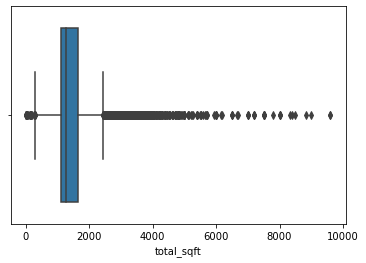

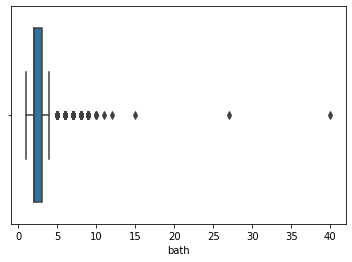

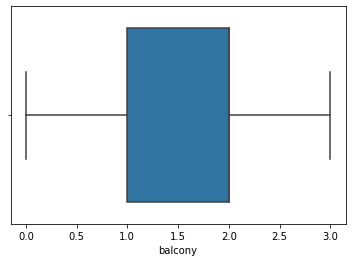

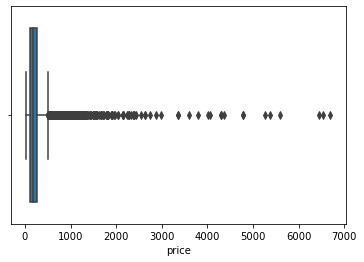

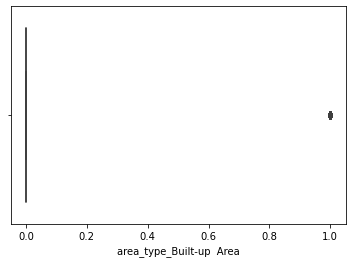

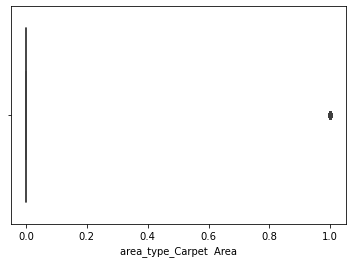

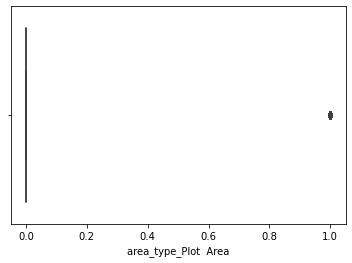

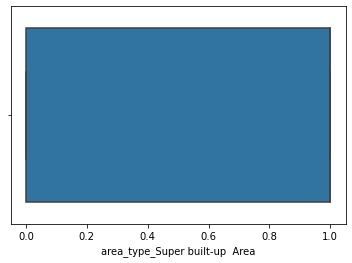

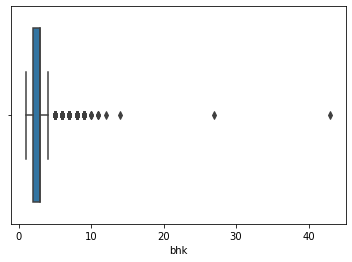

In [368]:
# What are the columns that contain outliers?

for col in train.columns:
    sns.boxplot(col, data=train)
    plt.show()

total_sqft


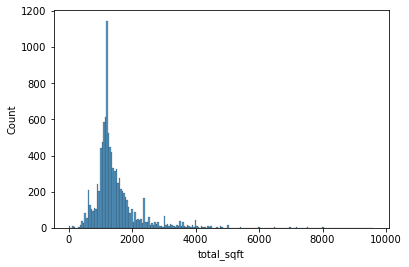



bath


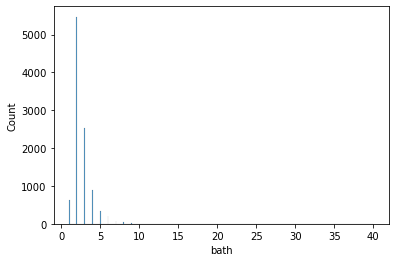



price


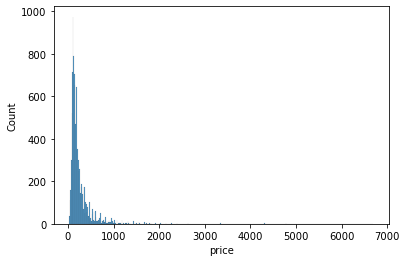



bhk


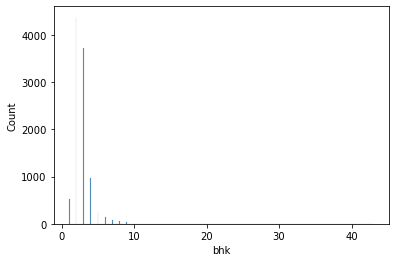

In [369]:
# see there distributions
for col in ['total_sqft', 'bath', 'price', 'bhk']:
    print(col)
    sns.histplot(data=train, x=col)
    plt.show()
    print() 
    print()

In [370]:
# std approach or iqr approach
for col in ['total_sqft', 'bath', 'price', 'bhk']:
    q25, q75 = np.percentile(train[col], 25), np.percentile(train[col], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers_removed = [x for x in train[col] if x >= lower and x <= upper]
    train = train.drop(train[(train[col] > upper) | (train[col] < lower)].index)
#     for i in train[col]:
#         if i < lower or i > upper:
#             train[col] = train[col].replace(i, np.median(train[col]))

In [371]:
train1 = train.copy()
train1

,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
3905,1135.0,2.0,3.0,102.770,0,0,0,1,2
11782,1787.0,3.0,2.0,286.800,0,0,0,1,3
10888,1061.0,2.0,1.0,81.260,0,0,0,1,2
7561,1700.0,3.0,3.0,358.500,0,0,0,1,3
2888,904.0,2.0,1.0,71.700,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...
3162,1665.0,3.0,3.0,167.300,0,0,0,1,3
7599,950.0,2.0,0.0,76.480,1,0,0,0,2
8060,650.0,1.0,1.0,47.800,0,0,0,1,2
12967,1328.0,2.0,1.0,133.840,0,0,0,1,3


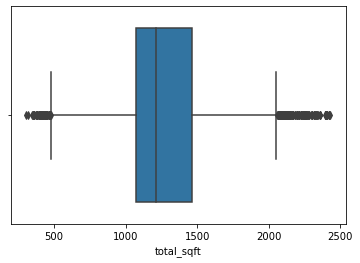

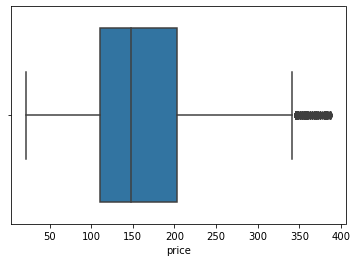

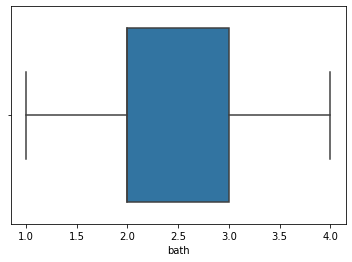

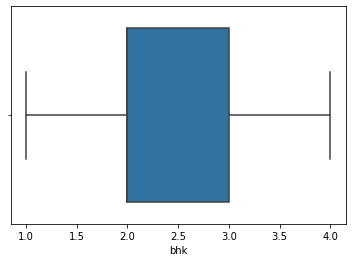

In [372]:
# see outliers removed or not............
for col in ['total_sqft', 'price', 'bath', 'bhk']:
    sns.boxplot(col, data=train1)
    plt.show()

**FOR TEST DATA**

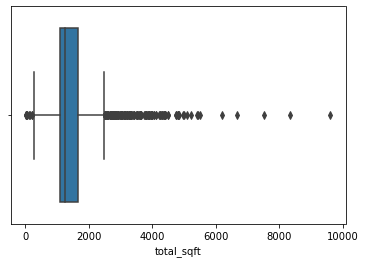

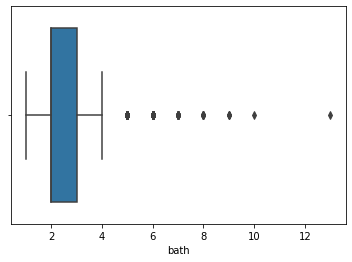

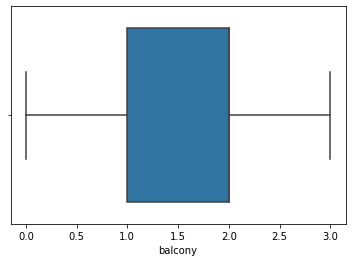

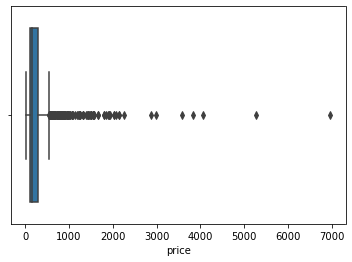

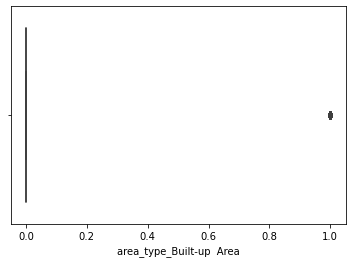

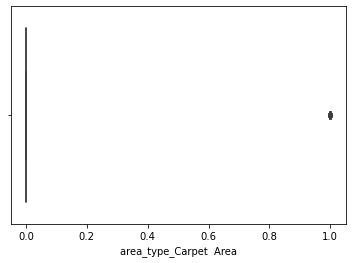

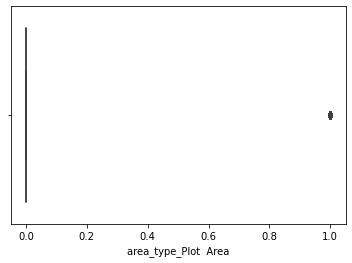

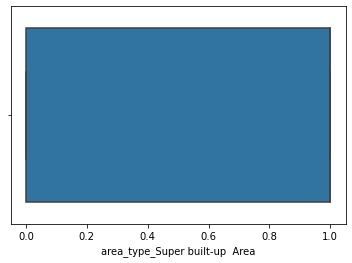

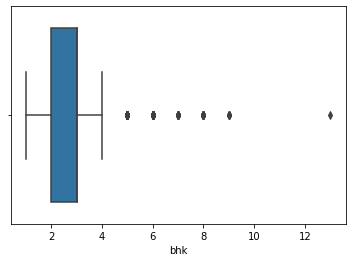

In [373]:
# What are the columns that contain outliers?

for col in train.columns:
    sns.boxplot(col, data=test) # see the data given is TEST data
    plt.show()

total_sqft


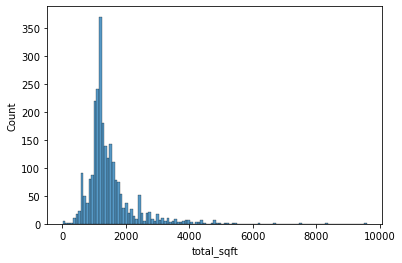



price


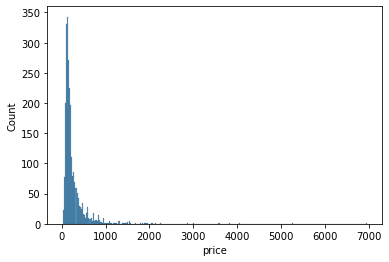



bath


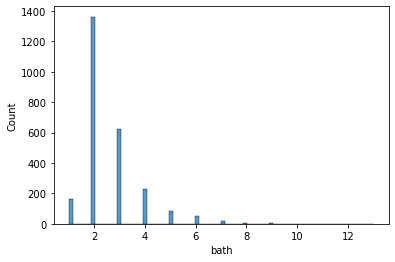



bhk


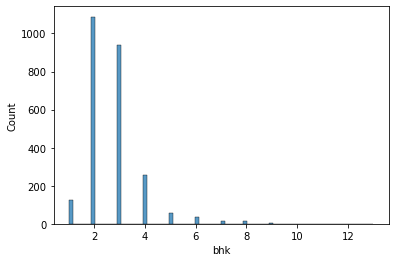

In [374]:
# see there distributions
for col in ['total_sqft', 'price', 'bath', 'bhk']:
    print(col)
    sns.histplot(data=test, x=col)
    plt.show()
    print() 
    print()

In [375]:
# # std approach or iqr approach
for col in ['total_sqft', 'price', 'bath', 'bhk']:
    q25, q75 = np.percentile(test[col], 25), np.percentile(test[col], 75) # see data given is test data
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers_removed = [x for x in test[col] if x >= lower and x <= upper]
    test = test.drop(test[(test[col] > upper) | (test[col] < lower)].index)
#     for i in test[col]:
#         if i < lower or i > upper:
#                 test[col] = test[col].replace(i, np.median(test[col]))

In [376]:
test1 = test.copy()
test1

,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
0,1056.0,2.0,1.0,93.3773,0,0,0,1,2
2,1440.0,2.0,3.0,148.1800,1,0,0,0,3
21,1755.0,3.0,1.0,291.5800,0,0,0,1,3
23,1767.0,3.0,1.0,246.1700,0,0,0,1,3
26,660.0,1.0,1.0,55.2090,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...
13263,1380.0,2.0,2.0,131.4500,1,0,0,0,3
13266,1665.0,3.0,2.0,171.0762,0,0,0,1,3
13285,1353.0,2.0,2.0,262.9000,0,0,0,1,2
13296,1200.0,2.0,2.0,334.6000,0,0,0,1,2


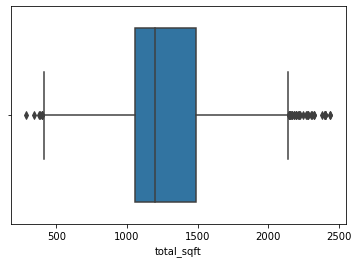

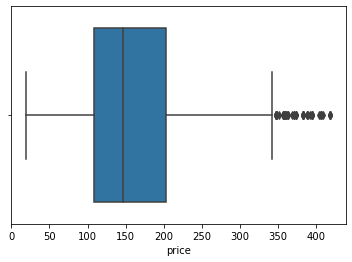

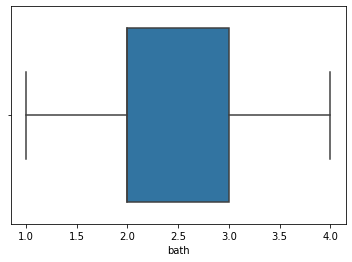

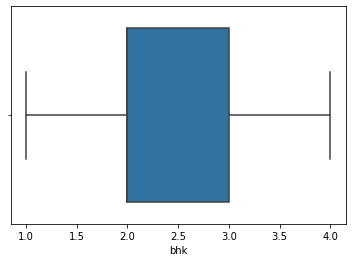

In [377]:
# see outliers removed or not............
for col in ['total_sqft', 'price', 'bath', 'bhk']:
    sns.boxplot(col, data=test1)
    plt.show()

# TRANSFORMATIONS

<AxesSubplot:xlabel='price', ylabel='Count'>

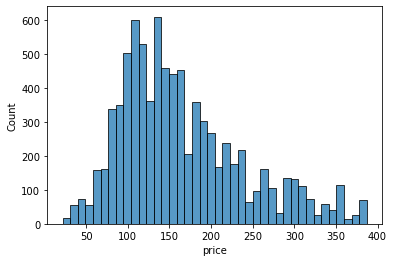

In [378]:
sns.histplot(data=train1, x='price')

<AxesSubplot:xlabel='price', ylabel='Count'>

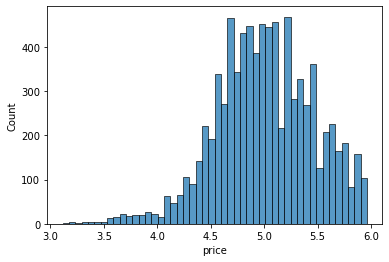

In [379]:
train1['price'] = np.log1p(train1['price'])
sns.histplot(data=train1, x='price')

<AxesSubplot:xlabel='price', ylabel='Count'>

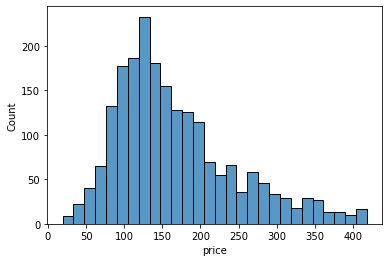

In [380]:
sns.histplot(data=test1, x='price')

<AxesSubplot:xlabel='price', ylabel='Count'>

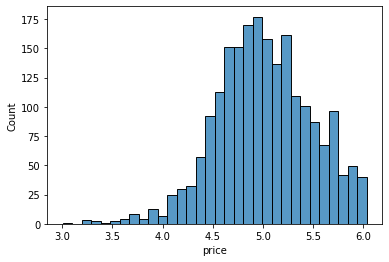

In [381]:
test1['price'] = np.log1p(test1['price'])
# plt.hist(test1['price'])
sns.histplot(data=test1, x='price')

In [382]:
cols = ['total_sqft', 'bath', 'balcony', 'bhk']
scaler = MinMaxScaler()
train2 = train1.copy()
test2 = test1.copy()

train2[cols] = scaler.fit_transform(train2[cols])
test2[cols] = scaler.transform(test2[cols])
# print(train2.describe())
# print()
# print(test2.describe)
train2.describe()

,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
count,8344.000000,8344.000000,8344.000000,8344.000000,8344.000000,8344.000000,8344.000000,8344.000000,8344.000000
mean,0.452625,0.417026,0.514461,5.007317,0.175575,0.006232,0.078739,0.739453,0.465284
std,0.164978,0.212824,0.257850,0.457001,0.380481,0.078702,0.269347,0.438959,0.218886
min,0.000000,0.000000,0.000000,3.113960,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360733,0.333333,0.333333,4.708990,0.000000,0.000000,0.000000,0.000000,0.333333
50%,0.428840,0.333333,0.666667,5.005154,0.000000,0.000000,0.000000,1.000000,0.333333
75%,0.546266,0.666667,0.666667,5.318855,0.000000,0.000000,0.000000,1.000000,0.666667
max,1.000000,1.000000,1.000000,5.961469,1.000000,1.000000,1.000000,1.000000,1.000000


# MODELING

In [383]:
# train1.drop(['area_type', 'availability'], axis=1, inplace=True)
# test1.drop(['area_type', 'availability'], axis=1, inplace=True)


X_train = train2.copy()
X_test = test2.copy()

y_train = X_train.pop('price')
y_test = X_test.pop('price')

X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)
X

,total_sqft,bath,balcony,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
3905,0.391264,0.333333,1.000000,0,0,0,1,0.333333
11782,0.697511,0.666667,0.666667,0,0,0,1,0.666667
10888,0.356505,0.333333,0.333333,0,0,0,1,0.333333
7561,0.656646,0.666667,1.000000,0,0,0,1,0.666667
2888,0.282762,0.333333,0.333333,1,0,0,0,0.333333
...,...,...,...,...,...,...,...,...
13263,0.506341,0.333333,0.666667,1,0,0,0,0.666667
13266,0.640207,0.666667,0.666667,0,0,0,1,0.666667
13285,0.493659,0.333333,0.666667,0,0,0,1,0.333333
13296,0.421794,0.333333,0.666667,0,0,0,1,0.333333


In [384]:
# Regressors = [
#     LinearRegression(),
#     KNeighborsRegressor(3),
#     SVR(),
#     DecisionTreeRegressor(),
#     RandomForestRegressor(),
#     AdaBoostRegressor(),
#     GradientBoostingRegressor(),
#     XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
# ]

# print('*************CROSS VALIDATION SCORES****************')

# for model in Regressors:
#     pipeline = Pipeline(steps=[('m', model)])
#     kf = KFold(n_splits=5)
#     score = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=kf).mean()
#     print(f'Model: {model}  error: {-score}')
# print()
# print('*************TRAIN TEST SPLIT SCORES*****************')
# for model in Regressors:
#     if model == XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4):
#         model.fit(X_train, y_train, 
#                  early_stopping_rounds=5, 
#                  eval_set=[(X_test, y_test)], 
#                  verbose=False)     
#         predictions = model.predict(X_test)
#         print(f'Model: {model} error: {mean_absolute_error(y_test, predictions)}')
#     model.fit(X_train, y_train)
#     predictions = model.predict(X_test)
#     print(f'Model: {model} error: {mean_absolute_error(y_test, predictions)} accuracy: {model.score(X_test, y_test)}')

In [385]:
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
# pipeline = Pipeline(steps=[('m', model)])
# kf = KFold(n_splits=5)
# score = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=kf).mean()
# print(f'Model: {model}  error: {-score}')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f'Model: {model} error: {mean_absolute_error(y_test, predictions)} accuracy: {model.score(X_test, y_test)}')

Model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) error: 0.2204947967524134 accuracy: 0.6167191138972312


In [386]:
joblib.dump(model, 'D:/PROJECTS/REGRESSION/model/model_joblib')

['D:/PROJECTS/REGRESSION/model/model_joblib']

In [387]:
mj = joblib.load('D:/PROJECTS/REGRESSION/model/model_joblib')

In [388]:
mj.predict(np.array([1050, 2, 1, 0, 0, 0, 1, 2]).reshape(1, 8)) * 100000

array([554873.70491028])

In [389]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("D:/PROJECTS/REGRESSION/model/columns.json","w") as f:
    f.write(json.dumps(columns))